# Author : Anuradha

In [110]:
# Load the dataset
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv("C:/7-clustering/crime_data.csv")

In [112]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [114]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [116]:
# Step 1: Data Exploration
print("\nData Information:")
print(data.info())


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB
None


In [118]:
print(data.isnull().sum())

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64


In [120]:
data=data.drop(columns=["Unnamed: 0"])



In [124]:
print(data.columns)

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')


In [126]:
# Drop non-numeric columns
import numpy as np
from sklearn.preprocessing import StandardScaler
data_numeric = data.select_dtypes(include=[np.number])

# Apply StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)


# Elbow curve

In [128]:
# Initilize variable to store wcss
from sklearn.cluster import KMeans
k_val = range(1,10)
wcss = []
for k in k_val:
    kmeans = KMeans(n_clusters=k, init = "k-means++", random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

C:\Users\anuradha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\anuradha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\anuradha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\anuradha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory le

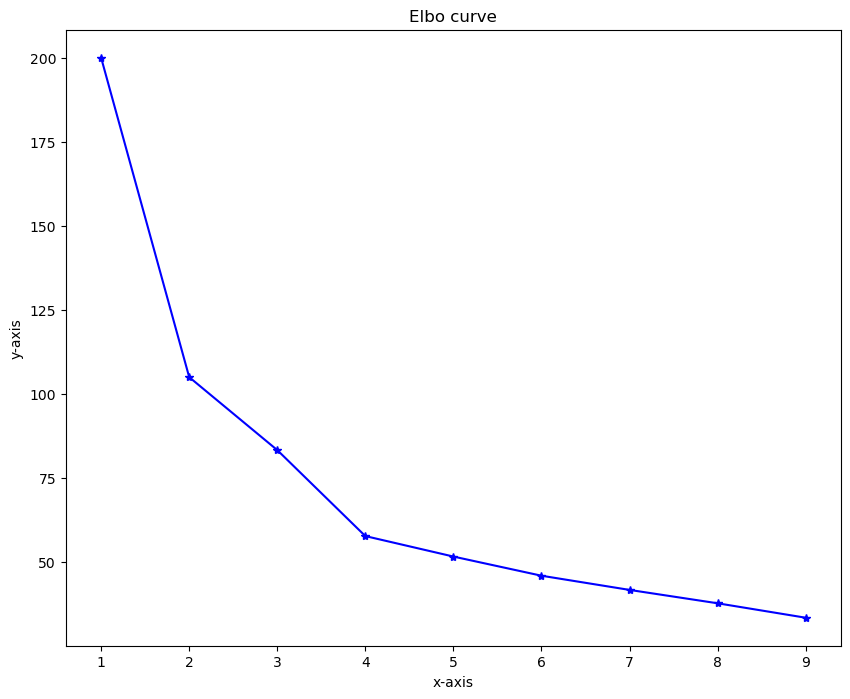

In [129]:
# plot elbo curve 
plt.figure(figsize=(10,8))
plt.plot(k_val,wcss, marker="*", color="blue")
plt.title("Elbo curve")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()

# K-Means clustering

In [132]:
# Initialize KMeans
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4, random_state=42)
y_predicted = km.fit_predict(data_numeric)
data1 = y_predicted

C:\Users\anuradha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [136]:
print(data_numeric.head())

   Murder  Assault  UrbanPop  Rape
0    13.2      236        58  21.2
1    10.0      263        48  44.5
2     8.1      294        80  31.0
3     8.8      190        50  19.5
4     9.0      276        91  40.6


In [138]:
print("Cluster Centers (scaled):")
print(km.cluster_centers_)

Cluster Centers (scaled):
[[  2.95        62.7         53.9         11.51      ]
 [ 11.8125     272.5625      68.3125      28.375     ]
 [  8.21428571 173.28571429  70.64285714  22.84285714]
 [  5.59       112.4         65.6         17.27      ]]


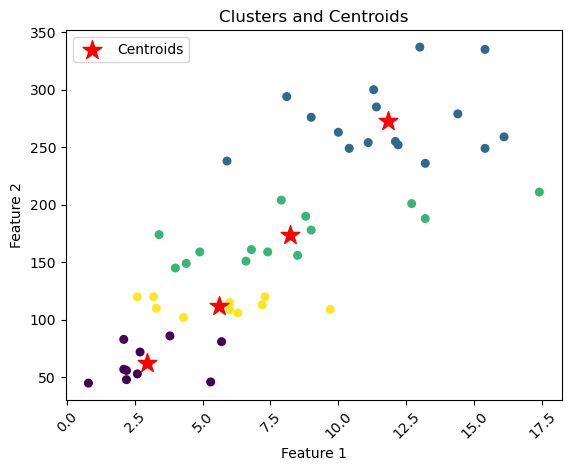

In [140]:
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=y_predicted, cmap='viridis', s=30)  # Use .iloc for index-based access
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=200, c='red', marker='*', label='Centroids')
plt.title('Clusters and Centroids')
plt.xticks(rotation=45)
plt.xlabel('Feature 1')  
plt.ylabel('Feature 2')  
plt.legend()
plt.show()